## Fitness Level Prediction from Demographic, Lifestyle, and Health Metrics

## Overview

This project focuses on developing a machine learning model that classifies an individual’s fitness status as either Fit or Not Fit based on demographic, physiological, and lifestyle factors. The dataset contains 2,000 records with attributes such as age, height, weight, heart rate, blood pressure, sleep hours, nutrition quality, activity index, smoking habits, and gender.

The goal is to leverage these features to predict the is_fit label, enabling proactive health assessment and early intervention strategies. The project includes data preprocessing, exploratory data analysis (EDA), feature engineering, model training, and performance evaluation using various classification algorithms.

By analyzing correlations between lifestyle habits, physiological measurements, and fitness outcomes, this model can help health professionals, fitness trainers, and wellness platforms in making data-driven recommendations to improve overall well-being.

## Datasets
The dataset was gotten from a source link (KAGGLE)
link is found here: https://www.kaggle.com/datasets/muhammedderric/fitness-classification-dataset-synthetic?resource

## Analytical Questions:

- How does age affect fitness levels?

- What is the relationship between height, weight, and fitness?

- Does blood pressure differ between fit and non-fit individuals?

- How does activity index influence fitness status?

- Which demographic group (age + gender) is most likely to be fit or unfit?

- Does better nutrition quality translate to higher fitness?

## DATA UNDERSTANDING

In [187]:
# impoort packages 
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


from scipy.stats import ttest_ind
from sklearn.feature_selection import chi2
import scipy.stats as stats
from scipy.stats import chi2_contingency
from scipy.stats import mannwhitneyu

In [188]:
# Loading our dataset
Fitness_df =pd.read_csv('../Dataset/fitness_dataset.csv')

In [189]:
Fitness_df .head()

,age,height_cm,weight_kg,heart_rate,blood_pressure,sleep_hours,nutrition_quality,activity_index,smokes,gender,is_fit
0,56,152,65,69.6,117.0,NaN,2.37,3.97,no,F,1
1,69,186,95,60.8,114.8,7.5,8.77,3.19,0,F,1
2,46,192,103,61.4,116.4,NaN,8.20,2.03,0,F,0
3,32,189,83,60.2,130.1,7.0,6.18,3.68,0,M,1
4,60,175,99,58.1,115.8,8.0,9.95,4.83,yes,F,1


## EXPLORATORY DATA ANALYSIS

In [190]:
Fitness_df.shape

(2000, 11)

In [191]:
Fitness_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                2000 non-null   int64  
 1   height_cm          2000 non-null   int64  
 2   weight_kg          2000 non-null   int64  
 3   heart_rate         2000 non-null   float64
 4   blood_pressure     2000 non-null   float64
 5   sleep_hours        1840 non-null   float64
 6   nutrition_quality  2000 non-null   float64
 7   activity_index     2000 non-null   float64
 8   smokes             2000 non-null   object 
 9   gender             2000 non-null   object 
 10  is_fit             2000 non-null   int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 172.0+ KB


In [211]:
Fitness_df.columns

Index(['age', 'height_cm', 'weight_kg', 'heart_rate', 'blood_pressure',
       'sleep_hours', 'nutrition_quality', 'activity_index', 'smokes',
       'gender', 'is_fit'],
      dtype='object')

In [192]:
for column in Fitness_df:
        print(f"Column Name : {column}")
        print(Fitness_df[column].unique())
        print("-----------------------------")

Column Name : age
[56 69 46 32 60 25 78 38 75 36 40 28 41 70 53 57 20 39 19 61 47 55 77 50
 29 42 66 44 76 59 45 33 79 64 68 72 74 54 24 26 35 21 31 67 43 37 52 34
 23 71 51 27 48 65 62 58 18 22 30 49 73 63]
-----------------------------
Column Name : height_cm
[152 186 192 189 175 172 193 188 164 198 153 178 171 174 162 167 182 165
 194 191 151 184 183 179 181 195 196 159 169 154 150 163 199 197 158 173
 161 155 160 156 157 190 166 187 177 176 168 185 180 170]
-----------------------------
Column Name : weight_kg
[ 65  95 103  83  99  85  57 108  55  63  90  89  45  84 116 105  56  77
 113  52  69  74  91  30  62 110 112  80  35  72  59  46 107  73 118 119
  54  58 117  47 114  71  82  60  79 109 106  93  67  68  98  97 104  76
 111  88  92 101  78 100  81  51  64  87  75  48  94  70  50  86  61  66
  49  96 200 250 115  53 102 220]
-----------------------------
Column Name : heart_rate
[ 69.6  60.8  61.4  60.2  58.1  81.2  79.6  70.1  67.1  67.3  82.3  48.2
  63.8  59.4  86.3  64.3  

In [193]:
Fitness_df.isna().sum()

age                    0
height_cm              0
weight_kg              0
heart_rate             0
blood_pressure         0
sleep_hours          160
nutrition_quality      0
activity_index         0
smokes                 0
gender                 0
is_fit                 0
dtype: int64

In [194]:
Fitness_df[Fitness_df['sleep_hours'].isnull()]

,age,height_cm,weight_kg,heart_rate,blood_pressure,sleep_hours,nutrition_quality,activity_index,smokes,gender,is_fit
0,56,152,65,69.6,117.0,NaN,2.37,3.97,no,F,1
2,46,192,103,61.4,116.4,NaN,8.20,2.03,0,F,0
14,41,162,45,59.4,112.5,NaN,2.47,4.62,no,M,1
22,19,184,77,61.6,121.7,NaN,2.55,2.09,1,M,0
34,78,178,112,54.3,133.8,NaN,4.56,4.51,1,M,0
...,...,...,...,...,...,...,...,...,...,...,...
1944,33,193,46,102.2,98.4,NaN,4.19,4.85,no,M,1
1949,42,190,51,64.9,102.5,NaN,4.22,3.10,yes,F,0
1983,47,157,99,84.1,129.5,NaN,8.89,1.84,yes,M,0
1984,69,192,73,58.2,105.7,NaN,5.60,3.48,0,M,1


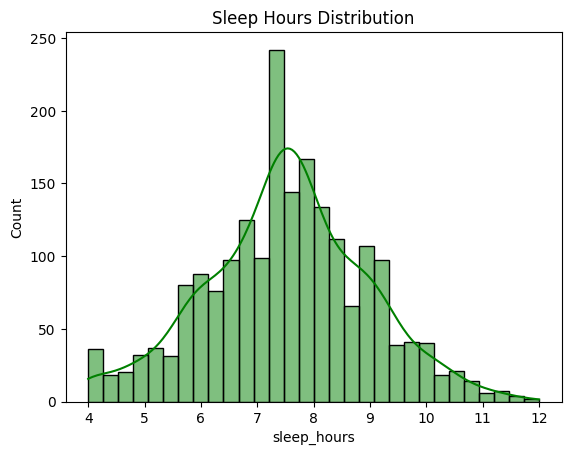

In [226]:
sns.histplot(Fitness_df['sleep_hours'], kde=True, bins=30, color= 'green' )
plt.title("Sleep Hours Distribution")
plt.show()

This shows sleep hours is normall distributed therefore we opt for using median as our imputer

In [196]:
Fitness_df.groupby('is_fit')['sleep_hours'].median()

is_fit
0    7.4
1    7.8
Name: sleep_hours, dtype: float64

In [197]:

# Fill missing sleep_hours with the mean of each isfit group
Fitness_df['sleep_hours'] = Fitness_df.groupby('is_fit')['sleep_hours'].transform(
    lambda x: x.fillna(x.median())
)

In [198]:
Fitness_df.isna().sum()

age                  0
height_cm            0
weight_kg            0
heart_rate           0
blood_pressure       0
sleep_hours          0
nutrition_quality    0
activity_index       0
smokes               0
gender               0
is_fit               0
dtype: int64

In [199]:
Fitness_df.duplicated().sum()

np.int64(0)

In [200]:
Fitness_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                2000 non-null   int64  
 1   height_cm          2000 non-null   int64  
 2   weight_kg          2000 non-null   int64  
 3   heart_rate         2000 non-null   float64
 4   blood_pressure     2000 non-null   float64
 5   sleep_hours        2000 non-null   float64
 6   nutrition_quality  2000 non-null   float64
 7   activity_index     2000 non-null   float64
 8   smokes             2000 non-null   object 
 9   gender             2000 non-null   object 
 10  is_fit             2000 non-null   int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 172.0+ KB


In [201]:
# Map string values "0" and "1" to "No" and "Yes"
Fitness_df['smokes'] = Fitness_df['smokes'].replace({'0': 'no', '1': 'yes'})

In [202]:
# Description statistics
Fitness_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,2000.0,NaN,NaN,NaN,49.114,17.926564,18.0,34.0,49.0,65.0,79.0
height_cm,2000.0,NaN,NaN,NaN,174.533,14.37175,150.0,162.0,174.0,187.0,199.0
weight_kg,2000.0,NaN,NaN,NaN,83.5405,25.852534,30.0,64.0,83.0,102.0,250.0
heart_rate,2000.0,NaN,NaN,NaN,70.2886,11.846339,45.0,62.1,70.25,78.425,118.6
blood_pressure,2000.0,NaN,NaN,NaN,119.90885,14.578032,90.0,109.7,120.0,129.8,171.2
sleep_hours,2000.0,NaN,NaN,NaN,7.51745,1.441811,4.0,6.6,7.5,8.4,12.0
nutrition_quality,2000.0,NaN,NaN,NaN,5.03514,2.864156,0.0,2.5475,5.065,7.47,10.0
activity_index,2000.0,NaN,NaN,NaN,2.99904,1.136383,1.0,2.0375,2.98,3.95,4.99
smokes,2000,2,no,1099,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,2000,2,F,1030,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# KEY INSIGHTS AND OBSERVATIONS

- Fitness enthusiasts have an average age of 49 years, with ages spanning from 18 to 79 years.

- Their average height is 175 cm, falling within a range of 150 cm to 199 cm.

- The typical weight is 83.5 kg, with values ranging between 30 kg and 250 kg.

- The mean resting heart rate is 70.3 bpm, varying from 45 bpm to 118.6 bpm.

- Average blood pressure is recorded at 119.9 mmHg, with readings from 90 mmHg to 171.2 mmHg.

- On average, they sleep 7.5 hours per night, with sleep duration ranging from 4 to 12 hours.

- Smoking is less prevalent among fitness participants than non-smokers.



## UNIVARIATE ANALYSIS

In [203]:
# Retrieve columns with numerical data types, excluding 'is_fit'
num_cols = Fitness_df.select_dtypes(include='number').drop(columns=['is_fit'])

In [204]:
#retrieving columns with object data types
cat_cols=Fitness_df.select_dtypes(include='object')
cat_cols.columns

Index(['smokes', 'gender'], dtype='object')

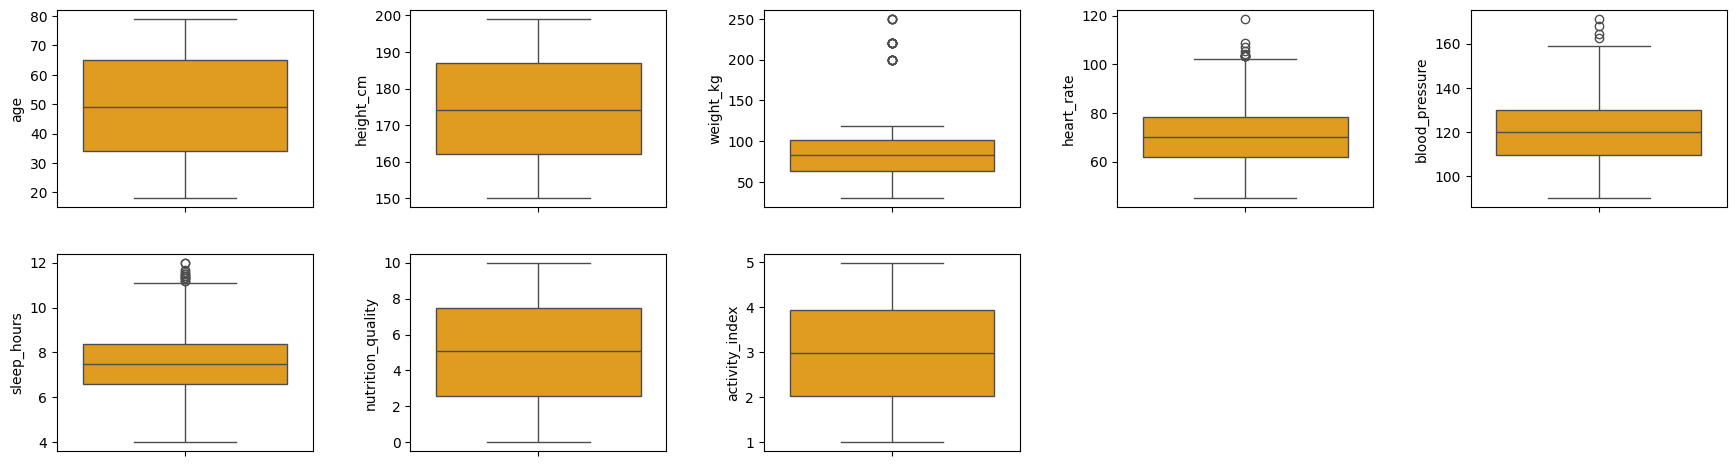

In [217]:
# plotting box plot for numerical data
plt.figure(figsize=(18, 15))

for i, variable in enumerate(num_cols):
    plt.subplot(6,5, i + 1)
    sns.boxplot(Fitness_df, y=Fitness_df[variable], color='orange')
    plt.tight_layout(pad=3),
    plt.xticks(rotation=45)
plt.show()

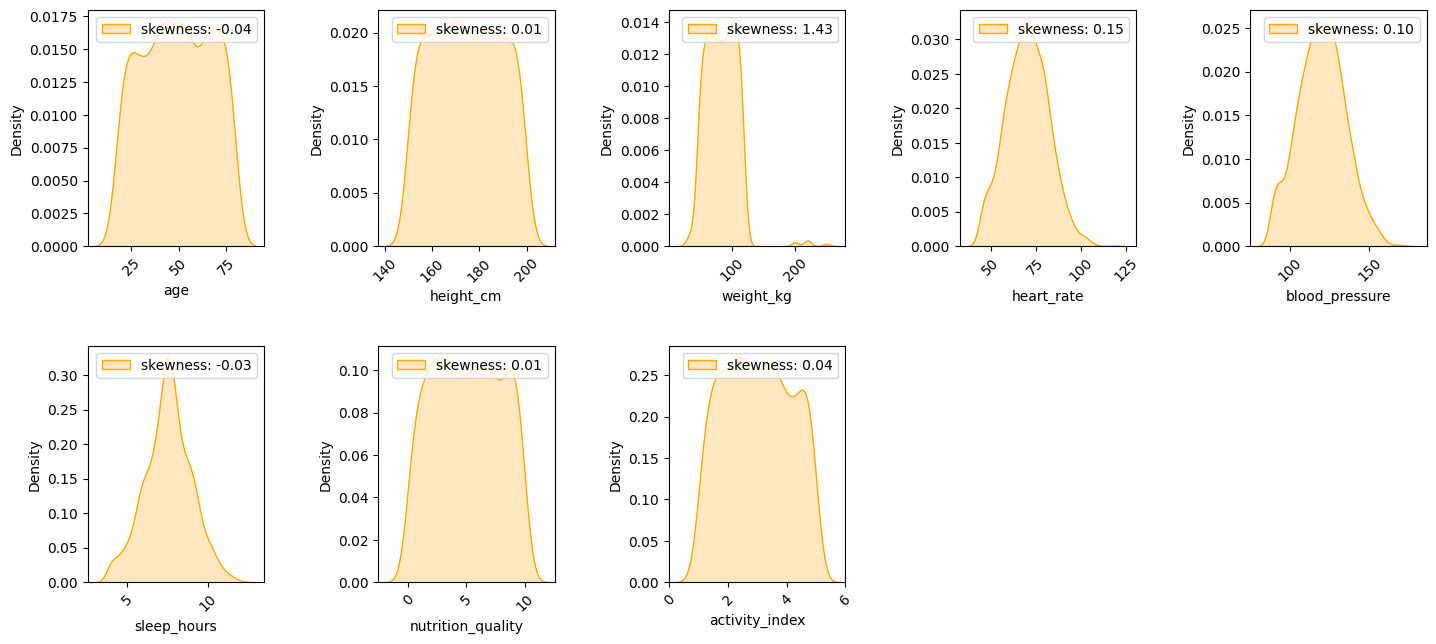

In [218]:
# Plot a Kernel density plot for the variables
plt.figure(figsize=(15, 20))

for i, variable in enumerate(num_cols):
    plt.subplot(6,5, i + 1)
    sns.kdeplot(Fitness_df,x=Fitness_df[variable],label= 'skewness: %.2f'%(Fitness_df[variable].skew()), fill = True,color='orange')
    plt.tight_layout(pad=3)
    plt.legend(loc = 'upper right')
    plt.xticks(rotation=45)

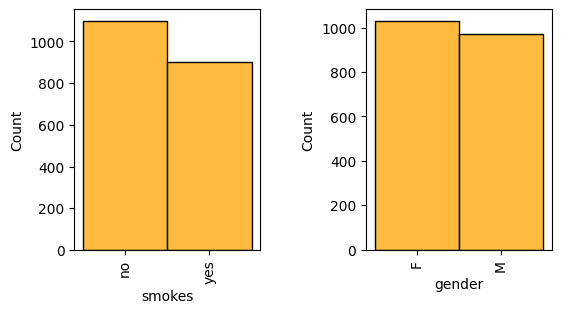

In [219]:
# Plot a Bar chart plot for the variables
plt.figure(figsize=(15, 20))

for i, variable in enumerate(cat_cols):
    plt.subplot(6,5, i + 1)
    sns.histplot(cat_cols,x=cat_cols[variable], color='orange')
    plt.tight_layout(pad=3)
    plt.xticks(rotation=90)

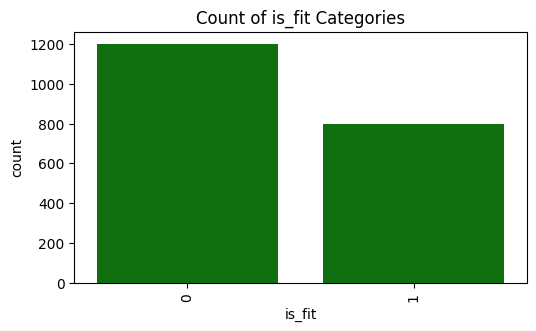

In [224]:
plt.figure(figsize=(6, 4))
sns.countplot(data=Fitness_df, x='is_fit', color='green')
plt.title('Count of is_fit Categories')
plt.tight_layout(pad=3)
plt.xticks(rotation=90)
plt.show()

# OBSERVATIONS

- Outliers were identified in weight (kg), blood pressure, and heart rate.

- Density, nutrition quality, and activity index followed a normal distribution, while weight (kg), heart rate, and blood pressure showed left skewness.

- The dataset contains a higher proportion of non-smokers compared to smokers.

- Females are more represented in the dataset than males.

##  BIVARIATE & MULTIVARIATE ANALYSIS 

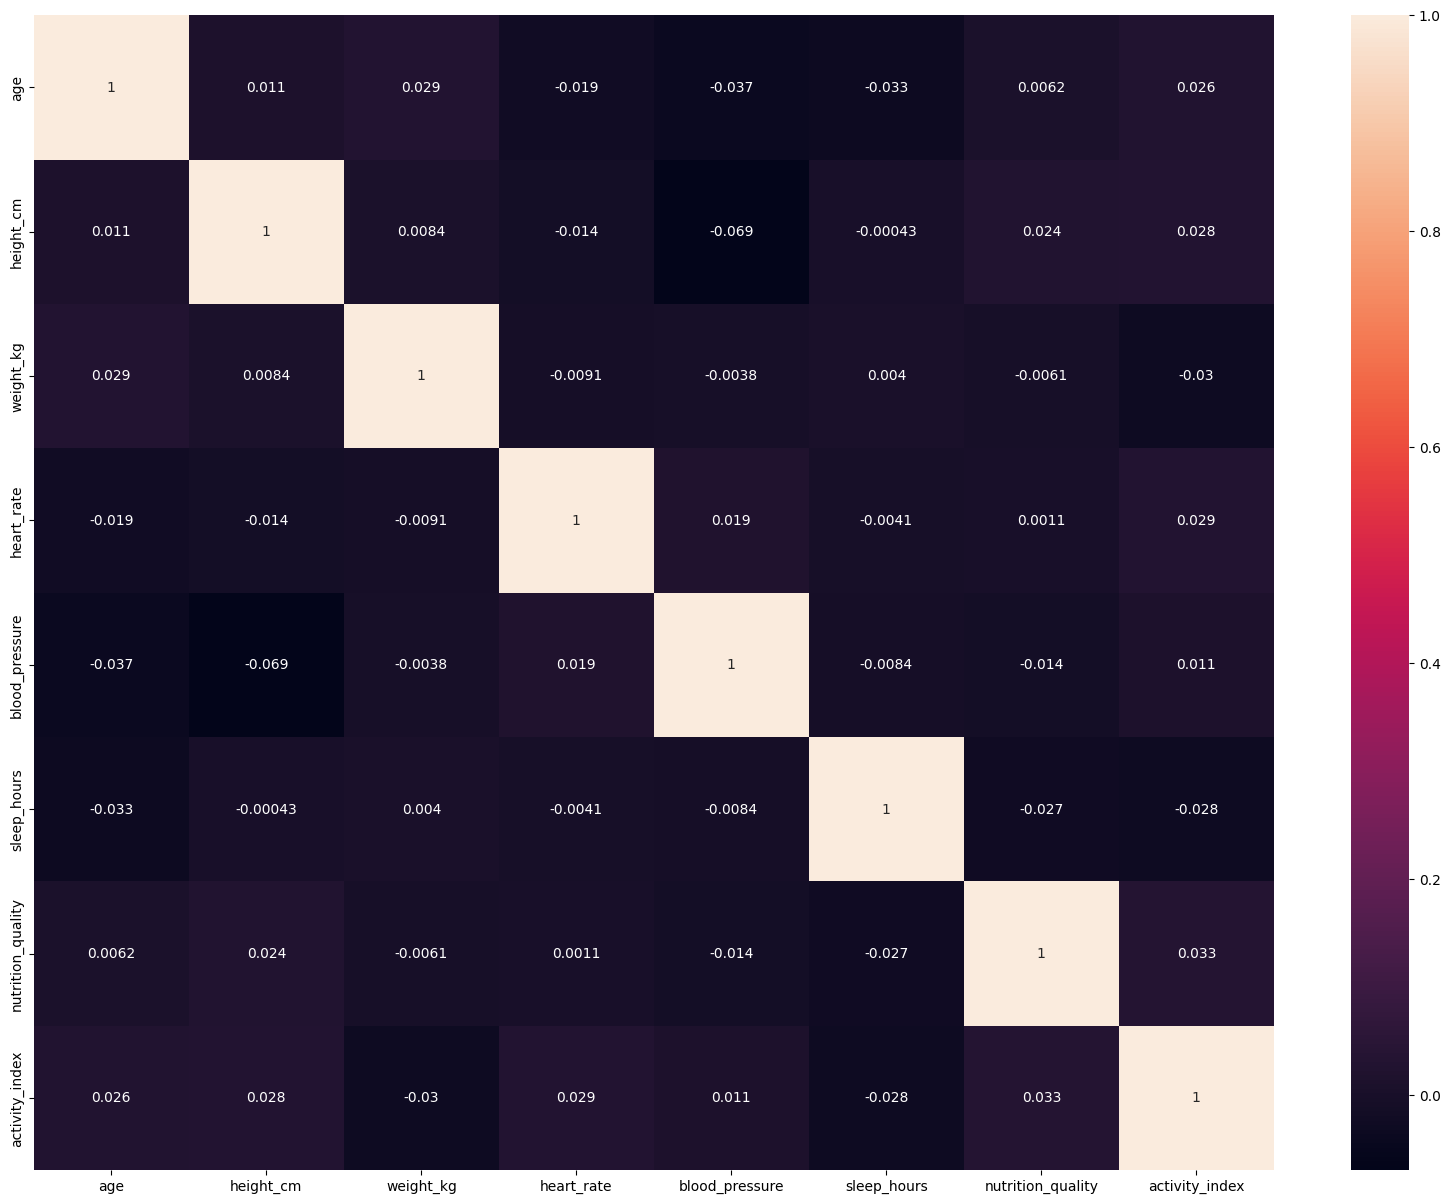

In [220]:
# plotting heatmap for correlatiuon between each variable
plt.figure(figsize=(20, 15))
sns.heatmap(data=num_cols.corr(), annot=True, color=['orange','brown'])
plt.show()

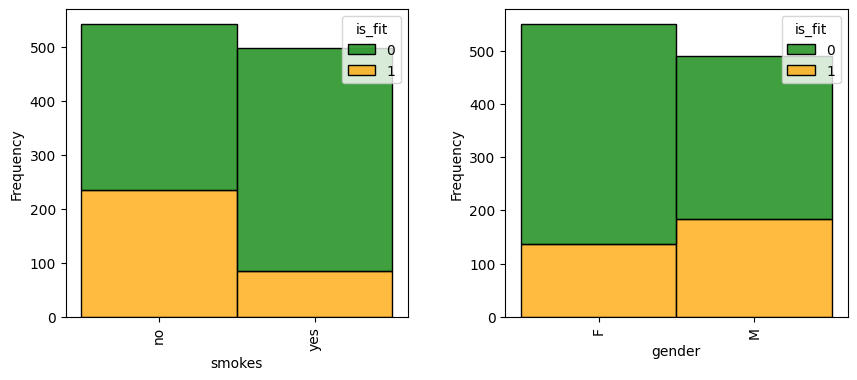

In [223]:
plt.figure(figsize=(18, 20))
# plotting histogram plot
for i, variable in enumerate(cat_cols):
    plt.subplot(5,4, i + 1)
    sns.histplot(Fitness_df,x=Fitness_df[variable], stat='frequency', hue='is_fit', multiple='stack', palette=['green','orange'])
    plt.tight_layout(pad=3)
    plt.xticks(rotation=90)

plt.show()

# OBSERVATIONS

- Age shows a positive, though weak, correlation with weight (kg) and height.

- Height is positively correlated with weight, nutrition quality, and activity index.

- Weight has a low positive correlation with sleep hours.

- Heart rate shows a stronger positive correlation with activity index.

- Nutrition quality has a very weak positive correlation with age.

- Individuals who do not smoke exhibit a higher rate of fitness compared to those who smoke.

- Females have a higher proportion of non-fit individuals compared to males, indicating that males are generally fitter than females in the dataset.

# ANALYTICAL QUESTIONS

- How does age affect fitness levels?

- What is the relationship between height, weight, and fitness?

- Does blood pressure differ between fit and non-fit individuals?

- How does activity index influence fitness status?

- Which demographic group (age + gender) is most likely to be fit or unfit?

- Does better nutrition quality translate to higher fitness?